## **Author**: *Manahil Khan*


# *Image Processing with Python*

## Importing Libraries

In [ ]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

## Image Loading and Display

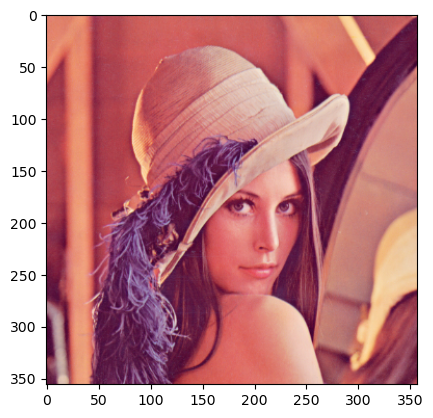

In [ ]:
img = cv2.imread('image.png', cv2.IMREAD_COLOR)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

## Applying Filters

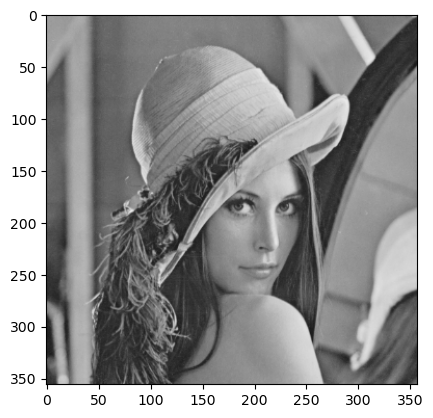

In [ ]:
#GRAYSCALE FILTER
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_RGB2BGR))

In [ ]:
#GAUSSIAN BLUR FILTER
blur_image = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)

plt.imshow(cv2.cvtColor(blur_image, cv2.COLOR_RGB2BGR))

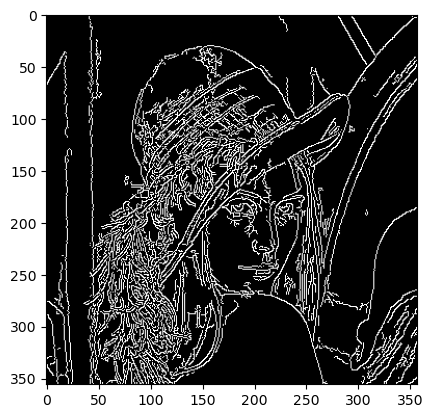

In [ ]:
#CANNY EDGE DETECTION FILTER
edge_image = cv2.Canny(gray_image, 30, 100)

plt.imshow(cv2.cvtColor(edge_image, cv2.COLOR_RGB2BGR))

## Color Models

In [ ]:
#RGB COLOR
plt.imshow(img)

In [ ]:
#HSV COLOR
hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_RGB2BGR))

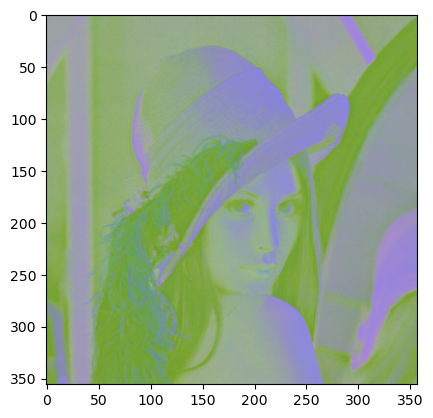

In [ ]:
#LAB COLOR
LAB_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

plt.imshow(cv2.cvtColor(LAB_image, cv2.COLOR_RGB2BGR))

## Geometric Transformations

In [ ]:
#Image Scaling
scale_percent = 50

width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)

dsize = (width, height)

resized_image = cv2.resize(img, dsize)

plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_RGB2BGR))

In [ ]:
#Image Shearing
num_rows, num_cols = img.shape[:2]

translation_matrix = np.float32([ [1,0,70], [0,1,110] ])

#img_translation = cv2.warpAffine(img, translation_matrix, (num_cols,num_rows))
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols + 70, num_rows + 110))

plt.imshow(cv2.cvtColor(img_translation, cv2.COLOR_RGB2BGR))

## Histogram Equalization

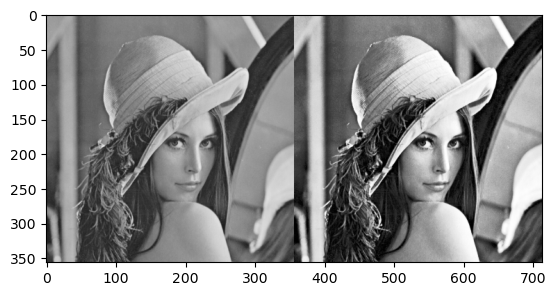

In [ ]:
equ = cv2.equalizeHist(gray_image)
equalize = np.hstack((gray_image,equ))

plt.imshow(cv2.cvtColor(equalize, cv2.COLOR_RGB2BGR))

## Color Channel Manipulation

Text(0.5, 1.0, 'Model Blue Image')

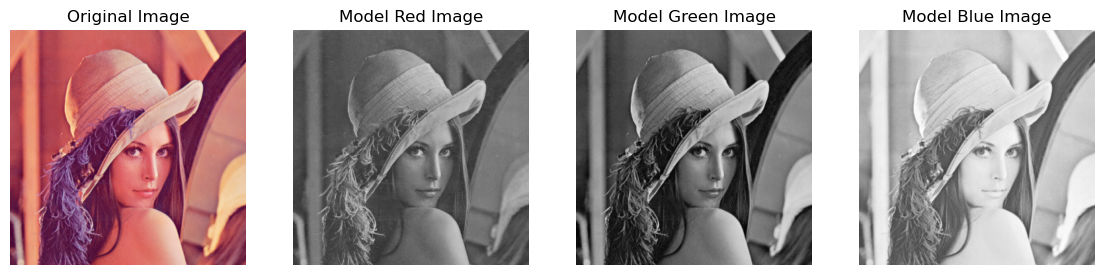

In [ ]:
#Splitting RGB Channels
r,g,b = cv2.split(img)

plt.figure(figsize=(14, 6))

plt.subplot(141)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.axis('off')
plt.title('Original Image')

# Display H channel
plt.subplot(142)
plt.imshow(cv2.cvtColor(r, cv2.COLOR_RGB2BGR))
plt.axis('off')
plt.title('Model Red Image')

# Display S channel
plt.subplot(143)
plt.imshow(cv2.cvtColor(g, cv2.COLOR_RGB2BGR))
plt.axis('off')
plt.title('Model Green Image')

# Display V channel
plt.subplot(144)
plt.imshow(cv2.cvtColor(b, cv2.COLOR_RGB2BGR))
plt.axis('off')
plt.title('Model Blue Image')



In [ ]:
#Merging RGB Channels
g = g*2
merge_image = cv2.merge([r, g, b])

merged = np.hstack((img,merge_image))

plt.imshow(cv2.cvtColor(merged, cv2.COLOR_RGB2BGR))
plt.title('Original Image vs Merged Image')

Text(0.5, 1.0, 'Original Image vs Merged Image')

## Custom Filters

(-0.5, 356.5, 355.5, -0.5)

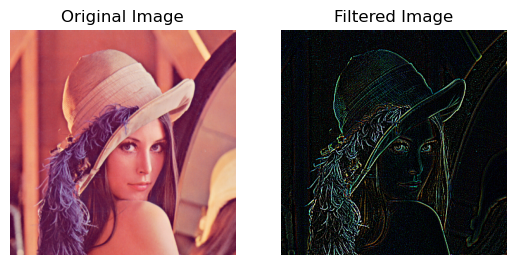

In [ ]:
kernel = np.ones((3,3),np.float32) * (-1)
kernel[1,1] = 8
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_RGB2BGR))
plt.title('Filtered Image')
plt.axis('off')

## Color Quantization

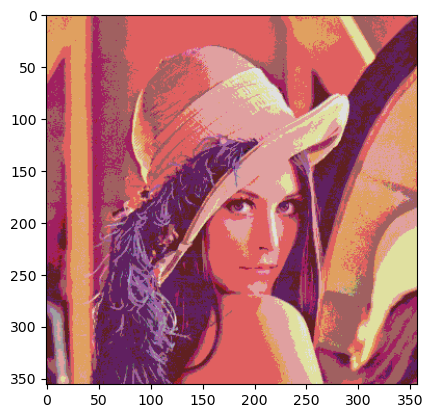

In [ ]:
div = 64
quantized = img // div * div + div // 2

plt.imshow(cv2.cvtColor(quantized, cv2.COLOR_RGB2BGR))

## Morphological Operations

Text(0.5, 1.0, 'Dilation')

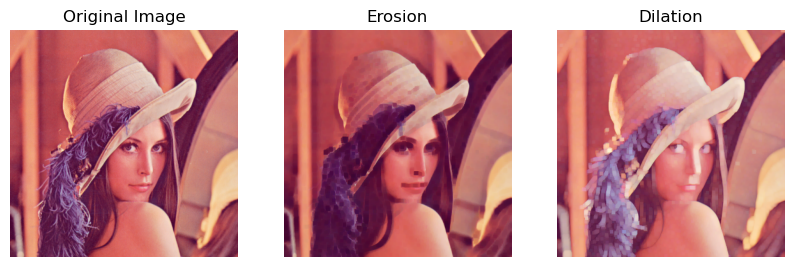

In [ ]:
kernel = np.ones((5, 5), np.uint8)

erosion_image = cv2.erode(img, kernel, iterations=1)
dilation_image = cv2.dilate(img, kernel, iterations=1)

plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.axis('off')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv2.cvtColor(erosion_image, cv2.COLOR_RGB2BGR))
plt.axis('off')
plt.title('Erosion')

plt.subplot(133)
plt.imshow(cv2.cvtColor(dilation_image, cv2.COLOR_RGB2BGR))
plt.axis('off')
plt.title('Dilation')

## Image Blending

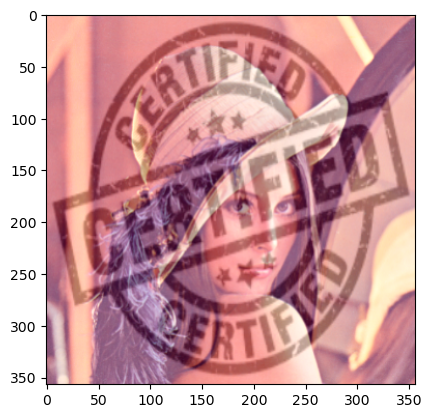

In [ ]:
img2 = cv2.imread('image2.png', cv2.IMREAD_COLOR)
img2 = cv2.resize(img2,(356, 357))

blended_image = cv2.addWeighted(img1, 0.8, img2, 0.3, 0)
plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_RGB2BGR))

## Image Compression

In [ ]:
jpeg_quality = 90
cv2.imwrite('lossy_compressed_image.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, jpeg_quality])

lossy_image = cv2.imread('lossy_compressed_image.jpg', cv2.IMREAD_COLOR)

In [ ]:
original_size = os.path.getsize('image.png')
lossy_size = os.path.getsize('lossy_compressed_image.jpg')

print(f'Original image size: {original_size} bytes')
print(f'Lossy compressed image size: {lossy_size} bytes')

Original image size: 291375 bytes
Lossy compressed image size: 35895 bytes


(-0.5, 356.5, 355.5, -0.5)

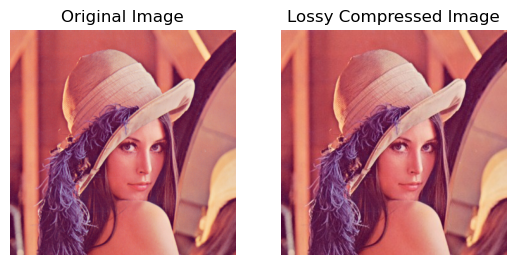

In [ ]:
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(cv2.cvtColor(lossy_image, cv2.COLOR_RGB2BGR))
plt.title('Lossy Compressed Image')
plt.axis('off')

##  Edge Enhancement

(-0.5, 356.5, 355.5, -0.5)

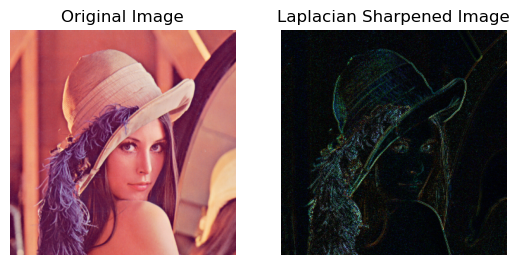

In [ ]:
sharpen_image = cv2.Laplacian(img, cv2.CV_64F)
sharpened_image = cv2.convertScaleAbs(sharpen_image)

plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_RGB2BGR))
plt.title('Laplacian Sharpened Image')
plt.axis('off')